# Data Preparation Notebook

This notebook performs data preparation and exploratory analysis on the dialysis facilities dataset. It includes data loading, merging, summary statistics, and visualization steps.

# I. Environment Setup

In [2]:
import pandas as pd
import scripts as func
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns



# II. DFC AND CHAPS Datasets

## 1. DATA Descritpion

## 2. Load Datasets
This section loads raw data from various CSV files.

### 2.1 Load DFC Facility Data

In [3]:
# Define the path to the data file
notebook_dir = os.path.dirname(os.path.abspath('__file__'))  # Get the directory of the current notebook
project_root = os.path.abspath(os.path.join(notebook_dir, '..', '..'))  # Navigate up two levels to project root
data_dir = os.path.join(project_root, '003_data', '002_clean-data')
file_name = 'national_cms_dialysis-facility_data.parquet'
path_dfc = os.path.join(data_dir, file_name)

# Check if the file exists
if not os.path.exists(path_dfc):
    raise FileNotFoundError(f"The file {path_dfc} does not exist. Please check the file path.")

# Load DFC Facility Data
df_dfc_raw = pd.read_parquet(path_dfc)

# Filter for California
df_dfc_raw_CA = df_dfc_raw[df_dfc_raw['state'] == 'CA']

# Select specific columns
dfc_columns = [
    'provider_number',
    'facility_name',
    'county',
    '_of_dialysis_stations',
    'profit_or_nonprofit',
    'chain_owned',
    'chain_organization',
    'mortality_rate_facility',
    'readmission_rate_facility',
    'patient_hospital_readmission_category'
]

# Create DataFrame with selected columns
df_dfc = df_dfc_raw_CA[dfc_columns]

# Convert CCN to integer, handling any non-numeric values
df_dfc['provider_number'] = pd.to_numeric(df_dfc['provider_number'], errors='coerce').astype('Int64')


C:\Users\kasra\AppData\Local\Temp\ipykernel_33552\3334128368.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dfc['provider_number'] = pd.to_numeric(df_dfc['provider_number'], errors='coerce').astype('Int64')


### 2.2 Load ICH CAHPS Facility Data

In [4]:

# Load ICH CAHPS Facility Data# Define the path to the data file
notebook_dir = os.path.dirname(os.path.abspath('__file__'))  # Get the directory of the current notebook
project_root = os.path.abspath(os.path.join(notebook_dir, '..', '..'))  # Navigate up two levels to project root
data_dir = os.path.join(project_root, '003_data', '001_raw-data')
file_name = '2017-2024_national_cms_dialysis-facility_cahps-data.parquet'
path_chaps = os.path.join(data_dir, file_name)

df_chaps_raw = pd.read_parquet(path_chaps)
df_chaps_RAW_CA = df_chaps_raw[df_chaps_raw['state'] == 'CA']

chaps_columns = [
    "provider_number",
    "total_number_of_completed_interviews_from_the_fall_and_spring_surveys",
    "survey_response_rate",
    "star_rating_of_the_dialysis_facility",
    "ich_cahps_survey_of_patients_experiences_star_rating",
    "linearized_score_of_nephrologists_communication_and_caring",
    "linearized_score_of_quality_of_dialysis_center_care_and_operations",
    "linearized_score_of_providing_information_to_patients",
    "linearized_score_of_rating_of_the_nephrologist",
    "linearized_score_of_rating_of_the_dialysis_center_staff",
    "linearized_score_of_rating_of_the_dialysis_facility",
    'year'
]

df_chaps = df_chaps_RAW_CA[chaps_columns]

# Function to convert to float first, then to Int64
def to_int64(series):
    return pd.to_numeric(series, errors='coerce').astype('Int64')

# Convert columns to Int64
int_columns = [
    "provider_number",
    "total_number_of_completed_interviews_from_the_fall_and_spring_surveys",
    "survey_response_rate",
    "star_rating_of_the_dialysis_facility",
    "ich_cahps_survey_of_patients_experiences_star_rating",
    'year'
]

for col in int_columns:
    df_chaps[col] = to_int64(df_chaps[col])

# Convert score columns to float
score_columns = [
    "linearized_score_of_nephrologists_communication_and_caring",
    "linearized_score_of_quality_of_dialysis_center_care_and_operations",
    "linearized_score_of_providing_information_to_patients",
    "linearized_score_of_rating_of_the_nephrologist",
    "linearized_score_of_rating_of_the_dialysis_center_staff",
    "linearized_score_of_rating_of_the_dialysis_facility"
]

for col in score_columns:
    df_chaps[col] = pd.to_numeric(df_chaps[col], errors='coerce')



C:\Users\kasra\AppData\Local\Temp\ipykernel_33552\1189730666.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chaps[col] = to_int64(df_chaps[col])
C:\Users\kasra\AppData\Local\Temp\ipykernel_33552\1189730666.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chaps[col] = pd.to_numeric(df_chaps[col], errors='coerce')


## 3. Data Merging
This section merges the loaded datasets based on common columns.

In [5]:
# Merge DFC and CHAPS data
df_fasc = df_dfc.merge(df_chaps, on='provider_number', how='left')

# Update data dictionary with new column names
data_dict = {
    'provider_number': 'CNN',
    'facility_name': 'FAC_NAME',
    'county': 'COUNTY',
    '_of_dialysis_stations': 'STATIONS',
    'profit_or_nonprofit': 'PROF_NP',
    'chain_owned': 'CHAIN_OWN',
    'chain_organization': 'CHAIN_ORG',
    'linearized_score_of_nephrologists_communication_and_caring': 'COMM_SCR',
    'linearized_score_of_quality_of_dialysis_center_care_and_operations': 'QUALITY_SCR',
    'linearized_score_of_providing_information_to_patients': 'INFO_SCR',
    'linearized_score_of_rating_of_the_nephrologist': 'PHYS_SCR',
    'linearized_score_of_rating_of_the_dialysis_center_staff': 'STAFF_SCR',
    'linearized_score_of_rating_of_the_dialysis_facility': 'FAC_SCR',
    'star_rating_of_the_dialysis_facility': 'FAC_STAR',
    'total_number_of_completed_interviews_from_the_fall_and_spring_surveys': 'SURVEY_COUNT',
    'ich_cahps_survey_of_patients_experiences_star_rating': 'XP_STAR',
    'survey_response_rate': 'SURVEY_RATE',
    'year': 'YEAR'
}

df_fasc.rename(columns=data_dict, inplace=True)


# Function to clean county names
def clean_county_name(name):
    if pd.isna(name) or name.strip() == '':
        return None
    name = name.strip().title()
    if name == 'Del Norte':
        return 'Del Norte'
    return name

# Clean county names
df_fasc['COUNTY'] = df_fasc['COUNTY'].apply(clean_county_name)


# Convert numeric columns to appropriate data type
numeric_columns = ['STATIONS', 'SURVEY_COUNT', 'SURVEY_RATE', 'FAC_STAR', 'XP_STAR', 'COMM_SCR', 'QUALITY_SCR',
                   'INFO_SCR', 'PHYS_SCR', 'STAFF_SCR', 'FAC_SCR', 'YEAR', 'mortality_rate_facility','readmission_rate_facility']
for col in numeric_columns:
    df_fasc[col] = pd.to_numeric(df_fasc[col], errors='coerce')

# Move 'YEAR' column to the leftmost position
columns = df_fasc.columns.tolist()
columns.remove('YEAR')
df_fasc = df_fasc[['YEAR'] + columns]


## 4. Basic Data Exploration
This section provides a brief overview of the merged dataset, including data types, summary statistics, and missing values.

In [6]:
print(df_fasc.COUNTY.unique())

['Santa Clara' 'Orange' 'Los Angeles' 'San Bernardino' 'Riverside'
 'San Diego' 'Alameda' 'Contra Costa' 'Sacramento' 'Santa Barbara'
 'Sonoma' 'Marin' 'Shasta' 'Stanislaus' 'Humboldt' 'San Mateo' 'Butte'
 'Santa Cruz' 'Sutter' 'Napa' 'Solano' 'Placer' 'Ventura' 'Monterey'
 'Merced' 'Lake' 'Fresno' 'Tuolumne' 'Kings' 'Kern' 'Tulare' 'Imperial'
 'El Dorado' 'San Joaquin' 'San Francisco' 'Nevada' 'San Luis Obispo'
 'Inyo' 'Yuba' 'Tehama' 'Madera' 'Mendocino' 'Yolo' 'Del Norte'
 'San Benito' None 'Columbia' 'Colusa']


In [6]:
# Display dataset information
df_fasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37741 entries, 0 to 37740
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   YEAR                                   37738 non-null  Int64  
 1   CNN                                    37741 non-null  Int64  
 2   FAC_NAME                               37741 non-null  object 
 3   COUNTY                                 36941 non-null  object 
 4   STATIONS                               37741 non-null  int64  
 5   PROF_NP                                37741 non-null  object 
 6   CHAIN_OWN                              37741 non-null  object 
 7   CHAIN_ORG                              37741 non-null  object 
 8   mortality_rate_facility                35434 non-null  float64
 9   readmission_rate_facility              35342 non-null  float64
 10  patient_hospital_readmission_category  33293 non-null  object 
 11  SU

In [7]:
# Summary statistics for numerical columns
# Summary statistics for numerical columns
df_fasc.describe().T

count           mean            std      min  \
YEAR                       37738.0    2021.027717       1.979136   2018.0   
CNN                        37741.0  318278.185236  253195.255615  50038.0   
STATIONS                   37741.0      20.639517       9.508625      0.0   
mortality_rate_facility    35434.0      21.802489       6.728506      0.0   
readmission_rate_facility  35342.0      26.576122       7.373863      0.0   
SURVEY_COUNT               23504.0       52.53259      18.494382     30.0   
SURVEY_RATE                 6564.0      25.783516       4.910743     12.0   
FAC_STAR                   23504.0       3.663802       0.957137      1.0   
XP_STAR                     6564.0       3.476234        0.82614      1.0   
COMM_SCR                   23504.0      81.701285        5.65835     60.0   
QUALITY_SCR                23504.0      81.239534       4.227045     67.0   
INFO_SCR                   23504.0        80.1778       5.314553     53.0   
PHYS_SCR                   23504.0      85.198434       4.624617     64.0   
STAFF_SCR                  23504.0      87.284717       3.733921     70.0   
FAC_SCR                    23504.0      88.637934       3.812707     72.0   

                               25%       50%       75%       max  
YEAR                        2019.0    2021.0    2023.0    2024.0  
CNN                        52731.0  552519.0  552703.0  752592.0  
STATIONS                      16.0      21.0      25.0      76.0  
mortality_rate_facility       17.6      21.0      24.9      83.5  
readmission_rate_facility     22.1      26.6      30.9      70.6  
SURVEY_COUNT                  39.0      48.0      62.0     141.0  
SURVEY_RATE                   22.0      25.0      29.0      45.0  
FAC_STAR                       3.0       4.0       4.0       5.0  
XP_STAR                        3.0       4.0       4.0       5.0  
COMM_SCR                      78.0      82.0      86.0      96.0  
QUALITY_SCR                   79.0      81.0      84.0      94.0  
INFO_SCR                      77.0      81.0      84.0      95.0  
PHYS_SCR                      82.0      86.0      88.0      97.0  
STAFF_SCR                     85.0      88.0      90.0      98.0  
FAC_SCR                       86.0      89.0      91.0      99.0

In [8]:
# Value counts for 'CHAIN_ORG' column

# Value counts for categorical columns
df_fasc['CHAIN_ORG'].value_counts()


CHAIN_ORG
DAVITA                                    11245
DaVita                                     7067
FRESENIUS MEDICAL CARE                     4603
Fresenius Medical Care                     2983
INDEPENDENT                                2448
SATELLITE HEALTHCARE                       1695
Independent                                1521
US RENAL CARE, INC.                        1192
Satellite Healthcare                       1073
US Renal Care, Inc.                         893
SATELLITE DIALYSIS                          440
DIALYSIS CLINIC, INC.                       315
KAISER PERMANENTE                           299
Kaiser Permanente                           255
Satellite Dialysis                          248
RENAL ADVANTAGE                             210
AMERICAN RENAL ASSOCIATES                   206
Dialysis Clinic, Inc.                       189
INNOVATIVE DIALYSIS SYSTEMS                 175
NATIONAL RENAL CARE                         175
American Renal Associates     

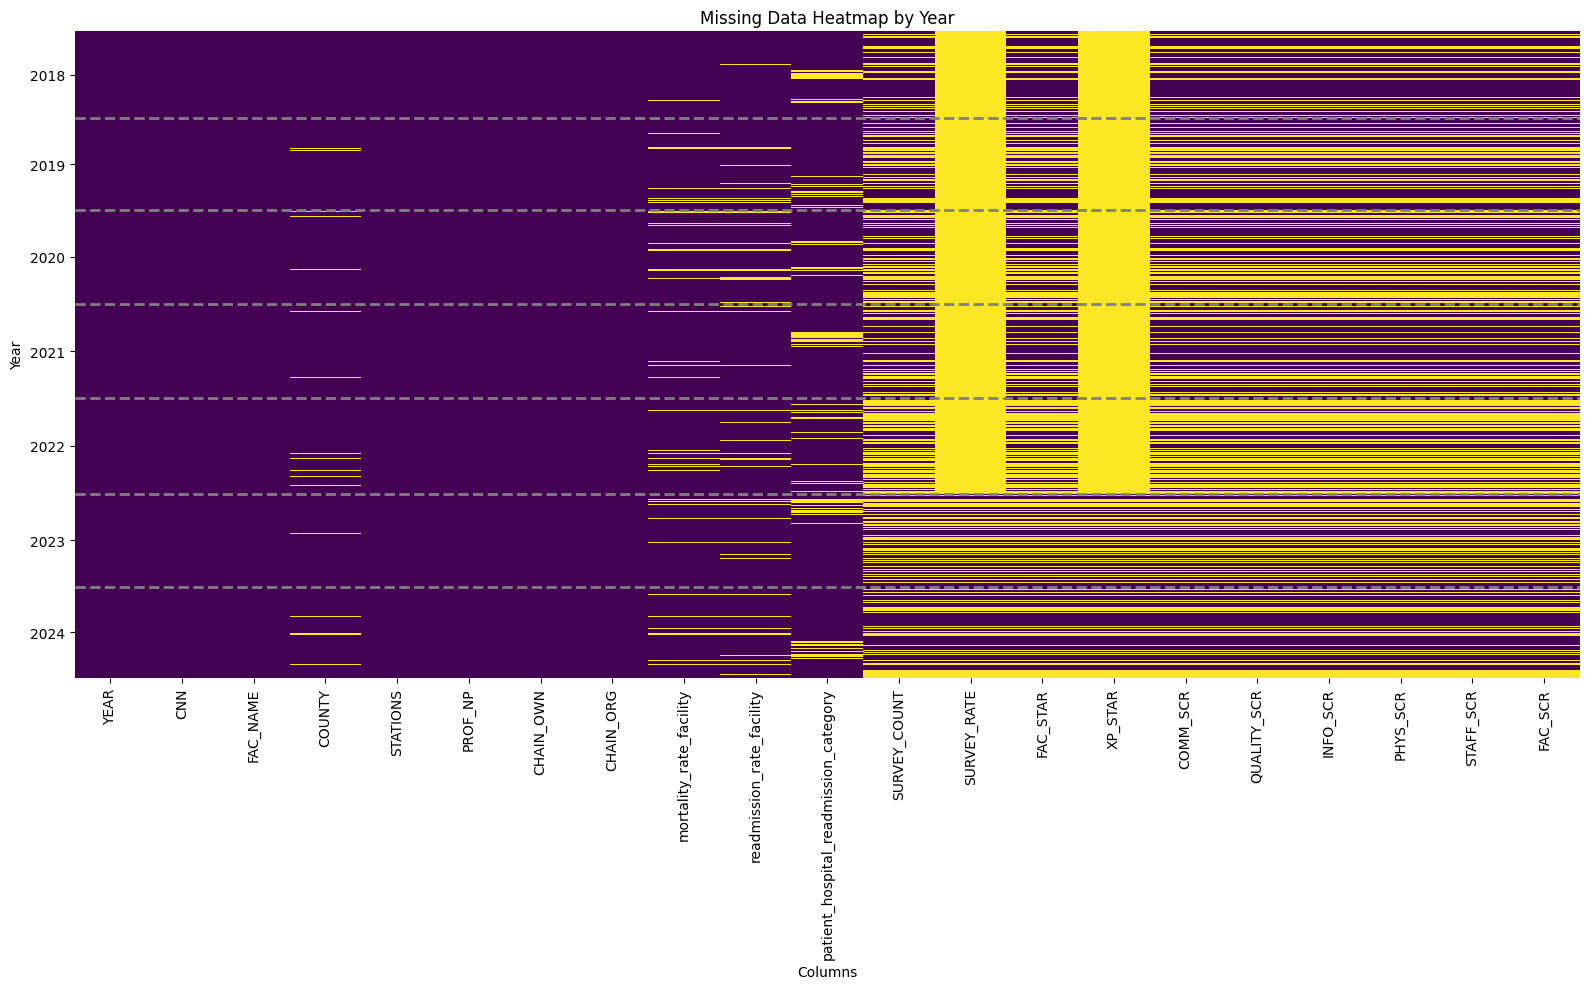

In [8]:
def plot_missing_data_heatmap(df):
    
    df.sort_values('YEAR', inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    # Create the heatmap
    plt.figure(figsize=(16, 10))
    ax = sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

    # Add horizontal lines to separate years
    years = df['YEAR'].dropna().unique()
    year_indices = [df[df['YEAR'] == year].index[0] for year in years]
    for idx in year_indices[1:]:  # Start from the second year
        plt.axhline(y=idx, color='gray', linestyle='--', linewidth=2)

    # Set y-axis ticks and labels
    ax.set_yticks([idx + (year_indices[i+1] - idx)/2 if i+1 < len(year_indices) else idx + (len(df) - idx)/2 
                for i, idx in enumerate(year_indices)])
    ax.set_yticklabels([int(year) for year in years], rotation=0)  # Convert years to integers

    plt.title('Missing Data Heatmap by Year')
    plt.xlabel('Columns')
    plt.ylabel('Year')
    plt.tight_layout()
    return ax

g = plot_missing_data_heatmap(df_fasc)
plt.show()

# # Count missing values in each column
# # Count missing values in each column
# missing_counts = df_fasc.isnull().sum()
# print(missing_counts)
# # Visualizing missing data using seaborn
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 6))
# sns.heatmap(df_fasc.isnull(), cbar=False, cmap='viridis')


In [10]:
# List all columns in the dataset
df_fasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37741 entries, 0 to 37740
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   YEAR                                   37738 non-null  Int64  
 1   CNN                                    37741 non-null  Int64  
 2   FAC_NAME                               37741 non-null  object 
 3   COUNTY                                 36941 non-null  object 
 4   STATIONS                               37741 non-null  int64  
 5   PROF_NP                                37741 non-null  object 
 6   CHAIN_OWN                              37741 non-null  object 
 7   CHAIN_ORG                              37741 non-null  object 
 8   mortality_rate_facility                35434 non-null  float64
 9   readmission_rate_facility              35342 non-null  float64
 10  patient_hospital_readmission_category  33293 non-null  object 
 11  SU

## 5. Data Visualization
This section includes visualizations to explore data distributions and relationships between variables.

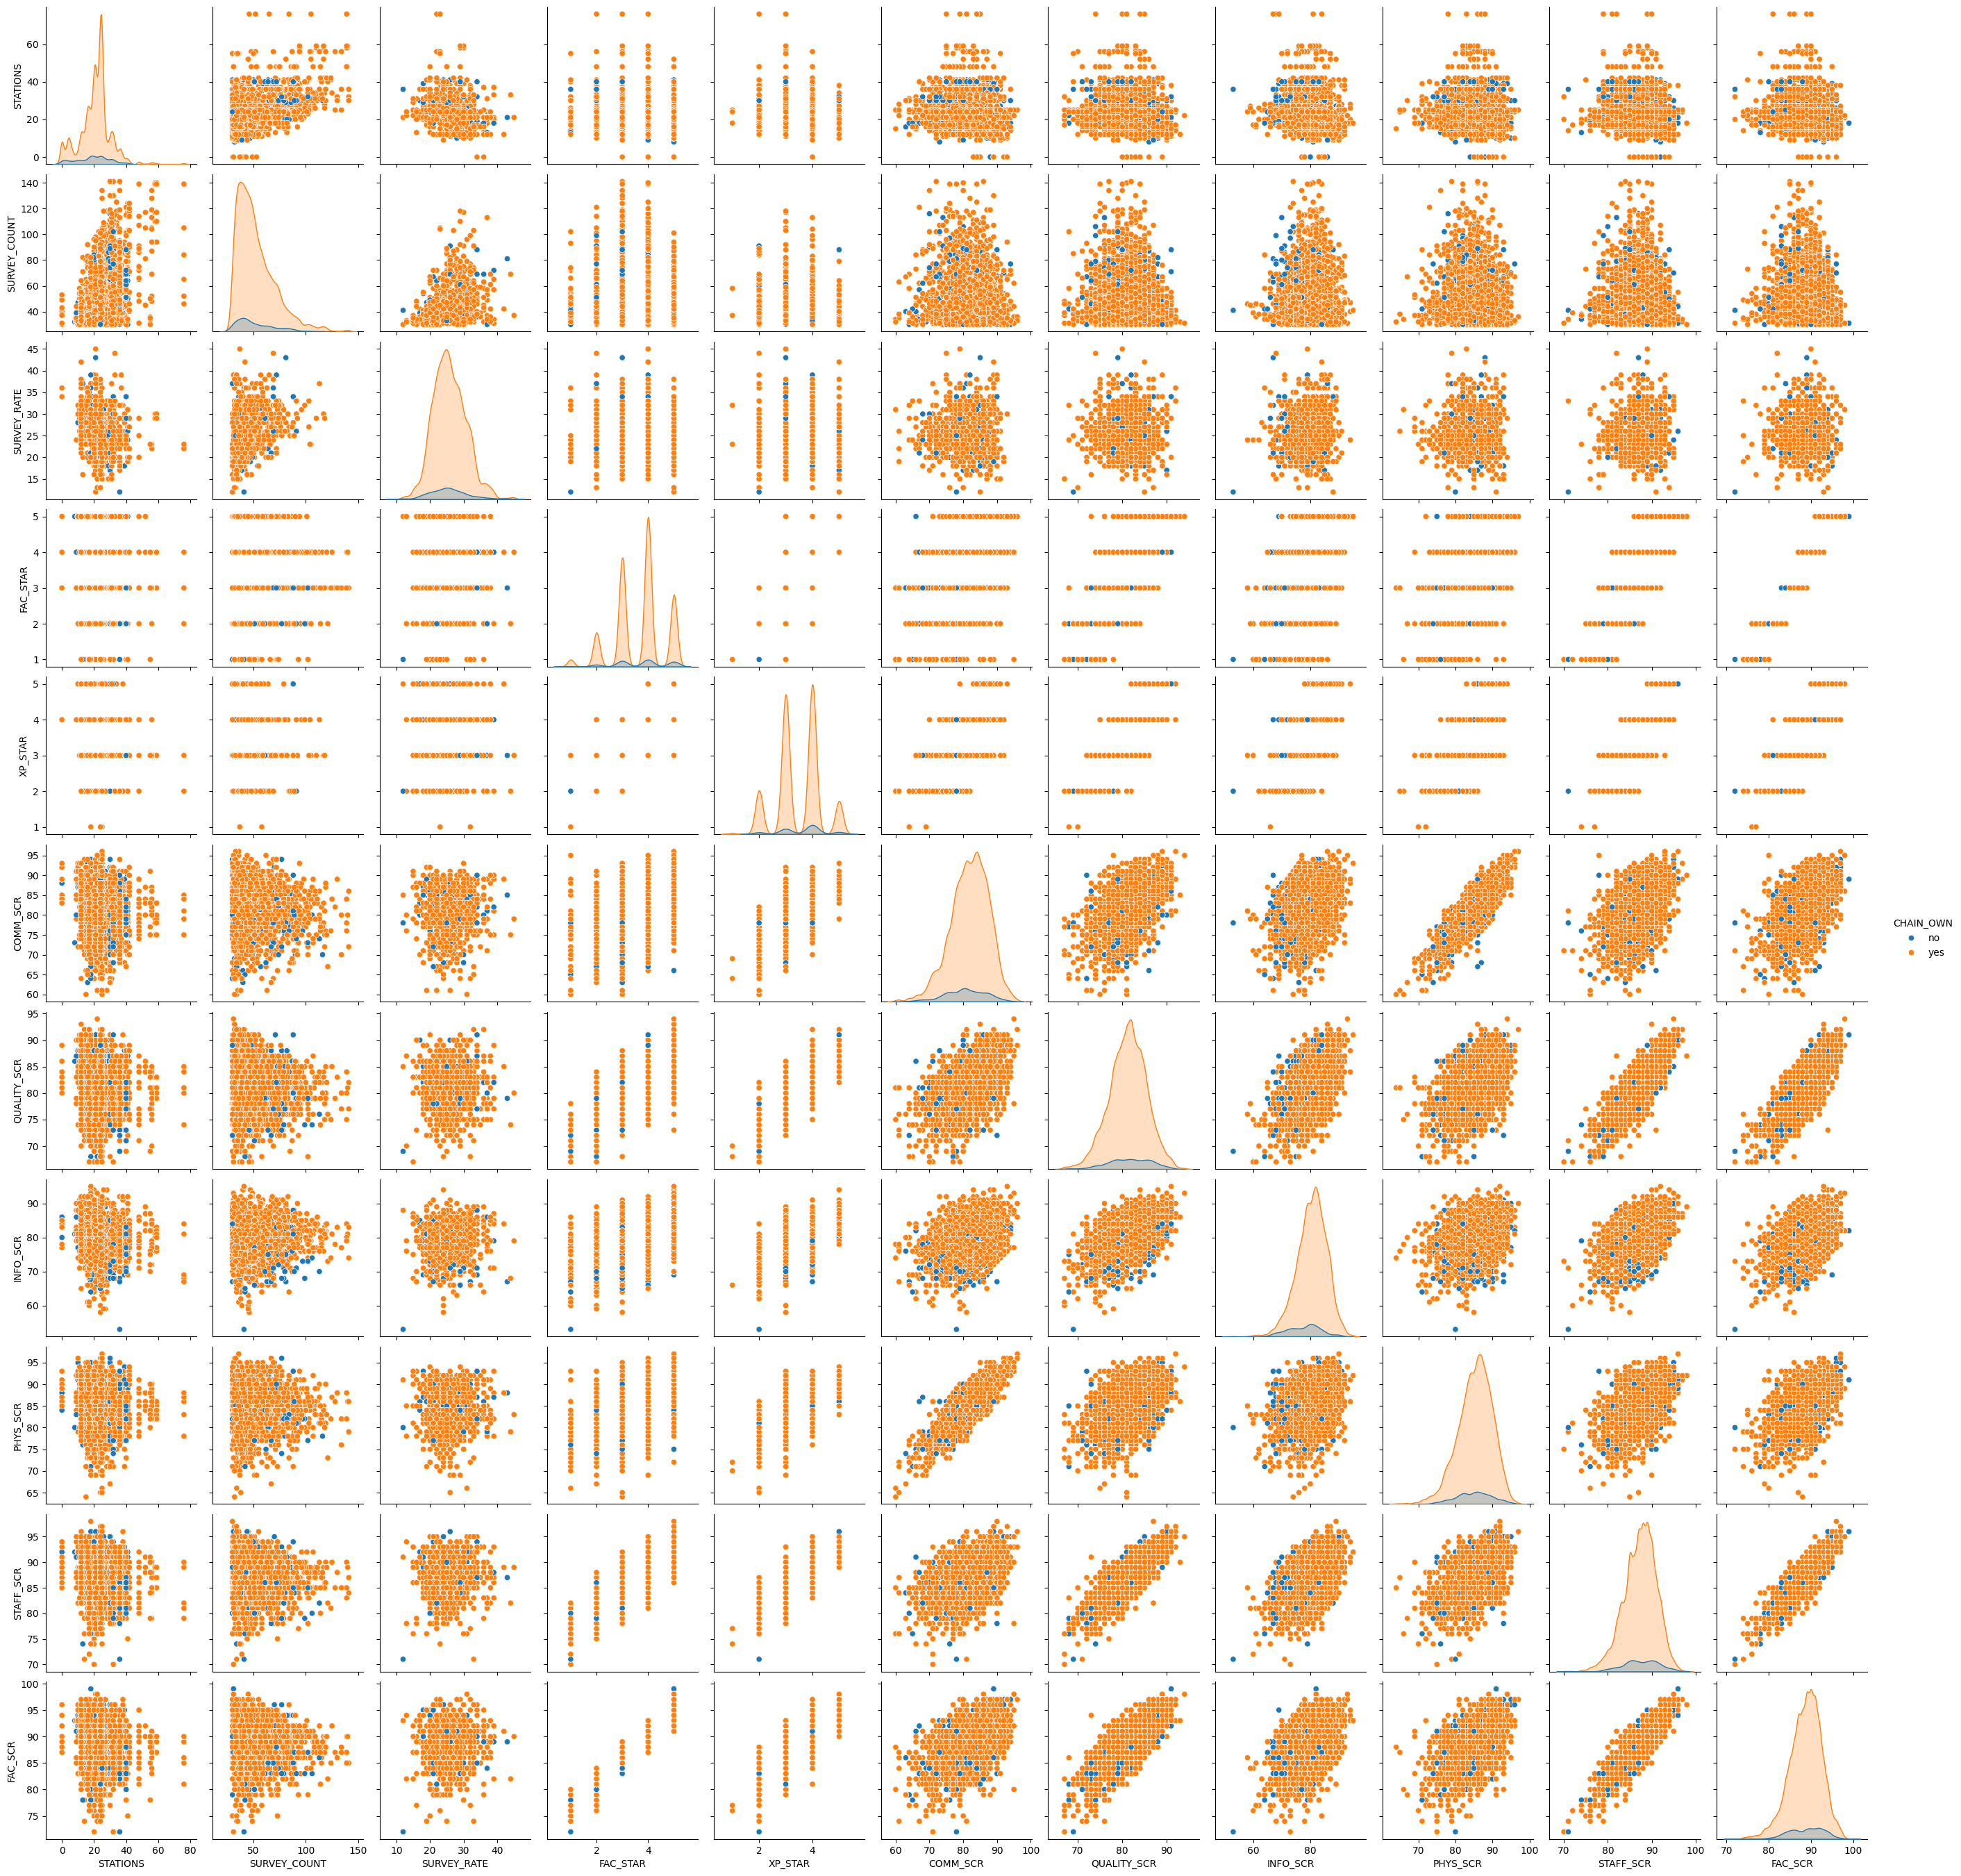

In [11]:
# Plot distributions for selected columns by chain ownership
import seaborn as sns

columns = ['STATIONS', 'SURVEY_COUNT', 'SURVEY_RATE', 'FAC_STAR', 'XP_STAR', 'COMM_SCR', 'QUALITY_SCR', 'INFO_SCR', 'PHYS_SCR', 'STAFF_SCR', 'FAC_SCR']
# Create the pairplot with the filtered columns
sns.pairplot(data=df_fasc, vars = columns, hue='CHAIN_OWN')


In [12]:
# # Further visualizations for selected columns by profit or non-profit:
# columns = ['STATIONS', 'SURVEY_COUNT', 'SURVEY_RATE', 'FAC_STAR', 'XP_STAR', 'COMM_SCR', 'QUALITY_SCR', 'INFO_SCR', 'PHYS_SCR', 'STAFF_SCR', 'FAC_SCR']
# sns.pairplot(data=df_fasc, vars = columns, hue='PROF_NP')


## 6. Data Aggregation
This section performs aggregation on the dataset, grouping by specific columns.

In [13]:
# Create a copy of the dataframe for aggregation
df_agg = df_fasc.copy()

# Convert PROF_NP and CHAIN_OWN to numeric if they're not already
df_agg['PROF_NP'] = df_agg['PROF_NP'].map({'profit': 1, 'non_profit': 0}).astype('Int64')
df_agg['CHAIN_OWN'] = df_agg['CHAIN_OWN'].map({'yes': 1, 'no': 0}).astype('Int64')

# Aggregate data by county
agg_funcs = {
    'CNN': 'count',  # Changed from 'CCN' to 'CNN'
    'STATIONS': 'sum',
    'PROF_NP': 'mean',
    'CHAIN_OWN': 'mean',
    'SURVEY_COUNT': 'sum',
    'SURVEY_RATE': 'mean',
    'FAC_STAR': 'mean',
    'XP_STAR': 'mean',
    'COMM_SCR': 'mean',
    'QUALITY_SCR': 'mean',
    'INFO_SCR': 'mean',
    'PHYS_SCR': 'mean',
    'STAFF_SCR': 'mean',
    'FAC_SCR': 'mean',
    'mortality_rate_facility': 'mean',
    'readmission_rate_facility': 'mean',
    'patient_hospital_readmission_category': lambda x: x.value_counts().index[0] # select the most frequent value for patient_hospital_readmission_category
}

# List of columns to keep after aggregation
agg_col = ['COUNTY', 'YEAR', 'FAC_COUNT', 'STATIONS', 'PROF_NP', 'CHAIN_OWN', 'SURVEY_COUNT',
           'SURVEY_RATE', 'FAC_STAR', 'XP_STAR', 'COMM_SCR', 'QUALITY_SCR',
           'INFO_SCR', 'PHYS_SCR', 'STAFF_SCR', 'FAC_SCR',
           'mortality_rate_facility', 'readmission_rate_facility','patient_hospital_readmission_category']

# Perform the aggregation
df_agg = df_agg.groupby(['YEAR', 'COUNTY']).agg(agg_funcs).reset_index()

# Rename the count column
df_agg.rename(columns={'CNN': 'FAC_COUNT'}, inplace=True)

# Select only the columns we want to keep
df_agg = df_agg[agg_col]

# Display the first few rows of the aggregated dataframe
df_agg.head()


COUNTY  YEAR  FAC_COUNT  STATIONS   PROF_NP  CHAIN_OWN  SURVEY_COUNT  \
0       Alameda  2018        240      4733  0.820833        1.0          8426   
1         Butte  2018         32       584      0.75        1.0          1040   
2      Columbia  2018          2        26       1.0        1.0            80   
3  Contra Costa  2018        137      2690  0.985401        1.0          6096   
4     El Dorado  2018          8       185       1.0        1.0           632   

   SURVEY_RATE  FAC_STAR  XP_STAR   COMM_SCR  QUALITY_SCR   INFO_SCR  \
0         <NA>   3.44586     <NA>  81.248408    81.433121  79.757962   
1         <NA>  3.666667     <NA>  80.666667    83.000000  84.000000   
2         <NA>       4.0     <NA>  84.000000    88.000000  75.000000   
3         <NA>  3.071429     <NA>  79.928571    79.571429  77.428571   
4         <NA>       4.0     <NA>  87.000000    86.000000  84.000000   

    PHYS_SCR  STAFF_SCR    FAC_SCR  mortality_rate_facility  \
0  84.738854  86.522293  87.980892                20.968333   
1  86.333333  87.666667  89.333333                23.178125   
2  89.000000  93.000000  90.000000                22.400000   
3  82.642857  85.857143  86.928571                20.151880   
4  85.000000  88.000000  90.000000                23.050000   

   readmission_rate_facility patient_hospital_readmission_category  
0                  27.377922                           As Expected  
1                  30.037500                           As Expected  
2                  21.900000                           As Expected  
3                  25.885271                           As Expected  
4                  29.062500                           As Expected

In [14]:
# Display aggregated dataset information
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   COUNTY                                 316 non-null    object 
 1   YEAR                                   316 non-null    Int64  
 2   FAC_COUNT                              316 non-null    Int64  
 3   STATIONS                               316 non-null    int64  
 4   PROF_NP                                316 non-null    Float64
 5   CHAIN_OWN                              316 non-null    Float64
 6   SURVEY_COUNT                           316 non-null    Int64  
 7   SURVEY_RATE                            78 non-null     Float64
 8   FAC_STAR                               275 non-null    Float64
 9   XP_STAR                                78 non-null     Float64
 10  COMM_SCR                               275 non-null    float64
 11  QUALIT

In [15]:
import plotly.express as px

def plot_treemap(df, year):
    # Filter data for the specified year
    df_agg_treemap = df[df['YEAR'] == year]
    
    # Check if there's any data for the specified year
    if df_agg_treemap.empty:
        print(f"No data available for year {year}")
        return
    
    # Remove rows with null values in FAC_STAR or STATIONS
    df_agg_treemap = df_agg_treemap.dropna(subset=['FAC_STAR', 'STATIONS'])
    
    # Check if there's any data left after removing null values
    if df_agg_treemap.empty:
        print(f"No valid data available for year {year} after removing null values")
        return
    
    # Calculate the average FAC_STAR, handling potential division by zero
    total_stations = df_agg_treemap['STATIONS'].sum()
    if total_stations > 0:
        avg_fac_star = np.average(df_agg_treemap['FAC_STAR'], weights=df_agg_treemap['STATIONS'])
    else:
        avg_fac_star = df_agg_treemap['FAC_STAR'].mean()  # Unweighted average if no stations
    
    # Create the treemap
    fig = px.treemap(df_agg_treemap, 
                     path=['COUNTY'], 
                     values='STATIONS',
                     color='FAC_STAR', 
                     hover_data=df_agg_treemap.columns,
                     color_continuous_scale='RdBu',
                     color_continuous_midpoint=avg_fac_star)
    
    # Update layout
    fig.update_layout(
        title_text=f"County-Level Facility Data Treemap for Year {year}",
        coloraxis_colorbar=dict(title="Facility Star Rating"),
    )
    
    # Show the plot
    fig.show()

# Example usage:
plot_treemap(df_agg, 2020)

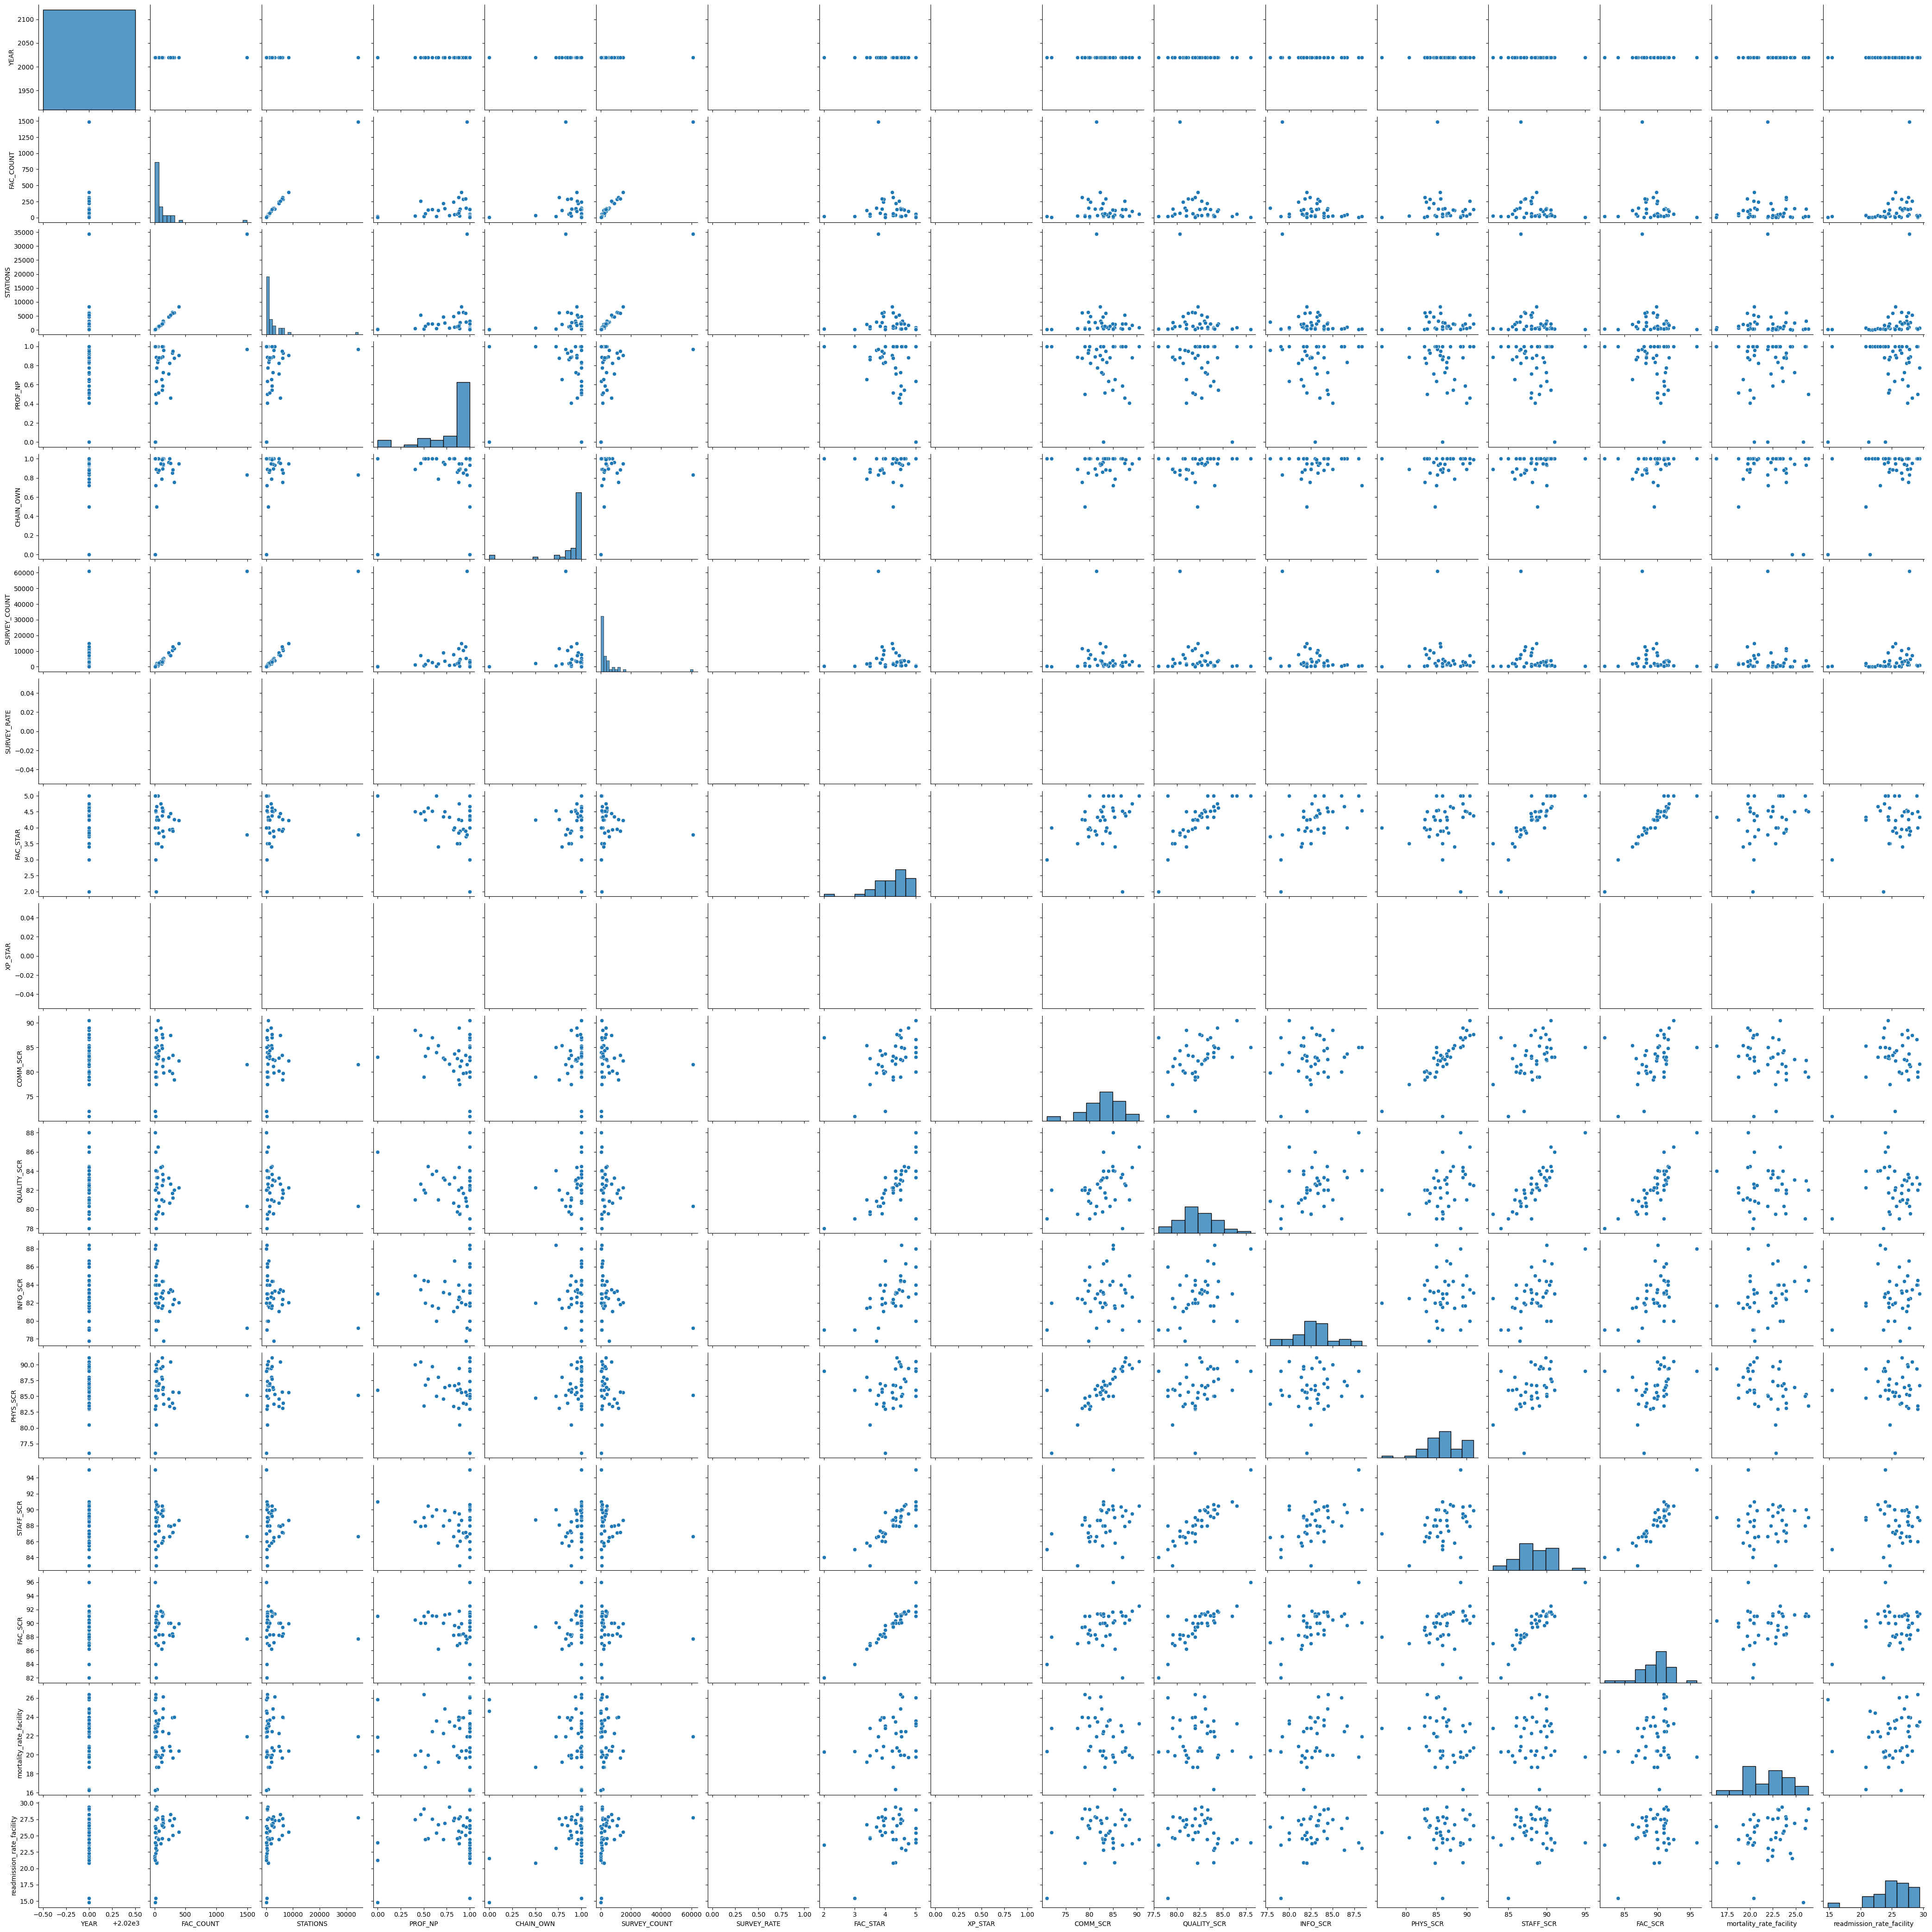

In [16]:
# Pairplot for aggregated data
df_plot = df_agg[df_agg['YEAR']==2020]
sns.pairplot(data=df_plot)

## 7. Export Cleaned Data

In [17]:
# base_dir = os.path.dirname(os.path.dirname(os.getcwd()))
# agg_output_file = os.path.join(base_dir, '009_supplemental', 'cleaned data', 'FASCILITY_CLEANED.csv')

# # Save the aggregated data to CSV
# df_agg.to_csv(agg_output_file, index=False)

# base_dir = os.path.dirname(os.path.dirname(os.getcwd()))
# non_agg_output_file = os.path.join(base_dir, '009_supplemental', 'cleaned data', 'FASCILITY_RECORDS_CLEANED.csv')

# # Save the aggregated data to CSV
# df_fasc.to_csv(non_agg_output_file, index=False)
